In [1]:
!git clone https://github.com/zhouhaoyi/Informer2020.git

Cloning into 'Informer2020'...
remote: Enumerating objects: 576, done.
remote: Counting objects: 100% (225/225), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 576 (delta 200), reused 185 (delta 185), pack-reused 351 (from 1)
Receiving objects: 100% (576/576), 6.48 MiB | 19.34 MiB/s, done.
Resolving deltas: 100% (336/336), done.


In [2]:
!git clone https://github.com/zhouhaoyi/ETDataset.git

Cloning into 'ETDataset'...
remote: Enumerating objects: 187, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 187 (delta 25), reused 20 (delta 20), pack-reused 159 (from 1)
Receiving objects: 100% (187/187), 3.86 MiB | 13.66 MiB/s, done.
Resolving deltas: 100% (62/62), done.


In [3]:
!pip install -r Informer2020/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 46.8 MB/s eta 0:00:00:00:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 100.2 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 99.3 MB/s eta 0:00:00:00:010:01
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [4]:
%cd Informer2020

/kaggle/working/Informer2020


In [5]:
from utils.tools import dotdict
from exp.exp_informer import Exp_Informer
import torch

In [44]:
args = dotdict()

args.model = 'informer'

args.data = 'ETTh1'
args.root_path = '/kaggle/working/ETDataset/ETT-small/'
args.data_path = 'ETTh1.csv'
args.features = 'M'
args.target = 'OT'
args.checkpoints = './informer_checkpoints'


args.seq_len = 96  # input sequence length of Informer encoder
args.label_len = 48  # start token length of Informer decoder
args.pred_len = 24  # prediction sequence length
# Informer decoder input: concat[start token series(label_len), zero padding series(pred_len)]

args.enc_in = 7  # encoder input size (dimensions for each time series vector)
args.dec_in = 7  # decoder input size (dimensions for each time series vector)
args.c_out = 7  # output size (dimensions for each time series vector)
args.factor = 5  # probsparse attn factor
args.d_model = 512  # dimension of model
args.n_heads = 8  # num of heads
args.e_layers = 2  # num of encoder layers
args.d_layers = 1  # num of decoder layers
args.d_ff = 2048  # dimension of fcn in model
args.dropout = 0.05  # dropout
args.attn = 'prob'  # attention used in encoder, options:[prob, full]
args.embed = 'timeF'  # time features encoding, options:[timeF, fixed, learned]
args.activation = 'gelu'  # activation
args.distil = True  # whether to use distilling in encoder
args.output_attention = False  # whether to output attention in encoder
args.mix = True
args.padding = 0
args.freq = 'h'
args.lradj = 'type1'

args.batch_size = 32
args.learning_rate = 0.0001
args.loss = 'mse'
args.tradj = 'type1'
args.use_amp = False  # whether to use automatic mixed precision training

args.num_workers = 0
args.itr = 1
args.train_epochs = 25
args.patience = 3
args.des = 'exp'

args.use_gpu = True if torch.cuda.is_available() else False
args.gpu = 0

args.use_multi_gpu = True
args.devices = '0,1'

In [45]:
args.use_gpu = True if torch.cuda.is_available() and args.use_gpu else False

if args.use_gpu and args.use_multi_gpu:
    args.devices = args.devices.replace(' ', '')
    device_ids = args.devices.split(',')
    args.device_ids = [int(id) for id in device_ids]
    args.gpu = args.device_ids[0]

In [46]:
# Set arguments by using data name
data_parser = {
    'ETTh1': {'data': 'ETTh1.csv', 'T': 'OT', 'M': [7, 7, 7], 'S': [1, 1, 1], 'MS': [7, 7, 1]},
    'ETTh2': {'data': 'ETTh2.csv', 'T': 'OT', 'M': [7, 7, 7], 'S': [1, 1, 1], 'MS': [7, 7, 1]},
    'ETTm1': {'data': 'ETTm1.csv', 'T': 'OT', 'M': [7, 7, 7], 'S': [1, 1, 1], 'MS': [7, 7, 1]},
    'ETTm2': {'data': 'ETTm2.csv', 'T': 'OT', 'M': [7, 7, 7], 'S': [1, 1, 1], 'MS': [7, 7, 1]},
}

if args.data in data_parser.keys():
    data_info = data_parser[args.data]
    args.data_path = data_info['data']
    args.target = data_info['T']
    args.enc_in, args.dec_in, args.c_out = data_info[args.features]

In [47]:
args.detail_freq = args.freq
args.freq = args.freq[-1:]

In [48]:

print('Args in experiment:')
print(args)

Args in experiment:
{'model': 'informer', 'data': 'ETTh1', 'root_path': '/kaggle/working/ETDataset/ETT-small/', 'data_path': 'ETTh1.csv', 'features': 'M', 'target': 'OT', 'checkpoints': './informer_checkpoints', 'seq_len': 96, 'label_len': 48, 'pred_len': 24, 'enc_in': 7, 'dec_in': 7, 'c_out': 7, 'factor': 5, 'd_model': 512, 'n_heads': 8, 'e_layers': 2, 'd_layers': 1, 'd_ff': 2048, 'dropout': 0.05, 'attn': 'prob', 'embed': 'timeF', 'activation': 'gelu', 'distil': True, 'output_attention': False, 'mix': True, 'padding': 0, 'freq': 'h', 'lradj': 'type1', 'batch_size': 32, 'learning_rate': 0.0001, 'loss': 'mse', 'tradj': 'type1', 'use_amp': False, 'num_workers': 0, 'itr': 1, 'train_epochs': 25, 'patience': 3, 'des': 'exp', 'use_gpu': True, 'gpu': 0, 'use_multi_gpu': True, 'devices': '0,1', 'device_ids': [0, 1], 'detail_freq': 'h'}


In [49]:
Exp = Exp_Informer

In [50]:
args.freq

'h'

In [51]:
import pandas as pd
etth1_csv = pd.read_csv('/kaggle/working/ETDataset/ETT-small/ETTh1.csv')

In [52]:
etth1_csv

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000
...,...,...,...,...,...,...,...,...
17415,2018-06-26 15:00:00,-1.674,3.550,-5.615,2.132,3.472,1.523,10.904000
17416,2018-06-26 16:00:00,-5.492,4.287,-9.132,2.274,3.533,1.675,11.044000
17417,2018-06-26 17:00:00,2.813,3.818,-0.817,2.097,3.716,1.523,10.271000
17418,2018-06-26 18:00:00,9.243,3.818,5.472,2.097,3.655,1.432,9.778000


In [53]:
args

{'model': 'informer',
 'data': 'ETTh1',
 'root_path': '/kaggle/working/ETDataset/ETT-small/',
 'data_path': 'ETTh1.csv',
 'features': 'M',
 'target': 'OT',
 'checkpoints': './informer_checkpoints',
 'seq_len': 96,
 'label_len': 48,
 'pred_len': 24,
 'enc_in': 7,
 'dec_in': 7,
 'c_out': 7,
 'factor': 5,
 'd_model': 512,
 'n_heads': 8,
 'e_layers': 2,
 'd_layers': 1,
 'd_ff': 2048,
 'dropout': 0.05,
 'attn': 'prob',
 'embed': 'timeF',
 'activation': 'gelu',
 'distil': True,
 'output_attention': False,
 'mix': True,
 'padding': 0,
 'freq': 'h',
 'lradj': 'type1',
 'batch_size': 32,
 'learning_rate': 0.0001,
 'loss': 'mse',
 'tradj': 'type1',
 'use_amp': False,
 'num_workers': 0,
 'itr': 1,
 'train_epochs': 25,
 'patience': 3,
 'des': 'exp',
 'use_gpu': True,
 'gpu': 0,
 'use_multi_gpu': True,
 'devices': '0,1',
 'device_ids': [0, 1],
 'detail_freq': 'h'}

In [36]:
    def adjust_learning_rate(optimizer, epoch, args):
        # Initialize lr_adjust with empty dict to avoid UnboundLocalError
        lr_adjust = {}
        
        if args.lradj == 'type1':
            lr_adjust = {epoch: args.learning_rate * (0.5 ** ((epoch-1) // 1))}
        elif args.lradj == 'type2':
            lr_adjust = {
                2: 5e-5, 4: 1e-5, 6: 5e-6, 8: 1e-6, 
                10: 5e-7, 15: 1e-7, 20: 5e-8
            }
        
        # Check if lr_adjust has values and epoch exists in it
        if lr_adjust and (epoch in lr_adjust):
            lr = lr_adjust[epoch]
            for param_group in optimizer.param_groups:
                param_group['lr'] = lr
            print(f'Updated learning rate to {lr}')

In [54]:
for ii in range(args.itr):
    # setting record of experiments
    setting = '{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_at{}_fc{}_eb{}_dt{}_mx{}_{}'.format(
        args.model, args.data, args.features, args.seq_len, args.label_len, args.pred_len,
        args.d_model, args.n_heads, args.e_layers, args.d_layers, args.d_ff, args.attn, args.factor, args.embed,
        args.distil, args.mix, ii)

    # set experiments
    exp = Exp(args)

    # train
    print('>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
    exp.train(setting)

    # test
    print('>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<'.format(setting))
    exp.test(setting)

    torch.cuda.empty_cache()

Use GPU: cuda:0
>>>>>>start training : informer_ETTh1_ftM_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_0>>>>>>>>>>>>>>>>>>>>>>>
train 8521
val 2857
test 2857
	iters: 100, epoch: 1 | loss: 0.4230488
	speed: 0.0659s/iter; left time: 431.4814s
	iters: 200, epoch: 1 | loss: 0.3464816
	speed: 0.0588s/iter; left time: 379.6386s
Epoch: 1 cost time: 16.2271249294281
Epoch: 1, Steps: 266 | Train Loss: 0.4118016 Vali Loss: 0.6634301 Test Loss: 0.5772583
Validation loss decreased (inf --> 0.663430).  Saving model ...
Updating learning rate to 0.0001
	iters: 100, epoch: 2 | loss: 0.2377476
	speed: 0.1487s/iter; left time: 934.3789s
	iters: 200, epoch: 2 | loss: 0.3214686
	speed: 0.0569s/iter; left time: 352.0898s
Epoch: 2 cost time: 15.202355146408081
Epoch: 2, Steps: 266 | Train Loss: 0.2542786 Vali Loss: 0.6555604 Test Loss: 0.5574310
Validation loss decreased (0.663430 --> 0.655560).  Saving model ...
Updating learning rate to 5e-05
	iters: 100, epoch: 3 | loss: 0.18

In [20]:
!pwd

/kaggle/working/Informer2020


In [55]:
import os 

setting = 'informer_ETTh1_ftM_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_0'

path = os.path.join(args.checkpoints,setting,'checkpoint.pth')

In [56]:
path

'./informer_checkpoints/informer_ETTh1_ftM_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_0/checkpoint.pth'

In [57]:
exp = Exp(args)
exp.predict(setting,True)

Use GPU: cuda:0
pred 1


In [2]:
%cd Informer2020

/kaggle/working/Informer2020


In [3]:
import os 

setting = 'informer_ETTh1_ftM_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_0'

import numpy as np 

metrics = np.load('./results/'+setting+'/metrics.npy') 

metrics.shape

(5,)

In [4]:
metrics

array([5.5195570e-01, 5.5836934e-01, 7.4724114e-01, 1.0354746e+01,
       3.3046789e+04], dtype=float32)

In [58]:
setting

'informer_ETTh1_ftM_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_0'

In [59]:
import numpy as np 

prediction = np.load('./results/'+setting+'/real_prediction.npy') 

prediction.shape

(1, 24, 7)

In [61]:
prediction[0]

array([[-0.12086412,  0.02386778,  0.01004123,  0.12992793, -0.59118533,
         0.15771665, -0.5187104 ],
       [ 0.01706975,  0.20246893,  0.16166481,  0.23834425, -0.80963355,
        -0.04075544, -0.5853476 ],
       [-0.13091303,  0.16762295,  0.20185064,  0.13426787, -0.6878366 ,
         0.0396787 , -0.5016884 ],
       [ 0.16044785,  0.5026555 ,  0.32227528,  0.5139177 , -0.748852  ,
         0.11673768, -0.6776488 ],
       [ 0.2727991 ,  0.5756921 ,  0.38186657,  0.5565163 , -0.600606  ,
         0.14870156, -0.711837  ],
       [ 0.3010828 ,  0.6130707 ,  0.40827382,  0.61280996, -0.58412474,
         0.11969616, -0.68685985],
       [ 0.5220279 ,  0.7267497 ,  0.6437069 ,  0.69839424, -0.16415991,
         0.15709747, -0.7210294 ],
       [ 0.5205483 ,  0.83513135,  0.51478237,  0.7829073 , -0.09563985,
         0.06881778, -0.6891274 ],
       [ 0.203474  ,  0.7236943 ,  0.27873302,  0.6059487 , -0.0113123 ,
         0.21296354, -0.7417134 ],
       [-0.4146526 ,  0.6835

In [68]:
def predict(exp, setting, load=False):
    pred_data, pred_loader = exp._get_data(flag='pred')
    if load:
        path = os.path.join(exp.args.checkpoints, setting)
        best_model_path = path + '/' + 'checkpoint.pth'
        exp.model.load_state_dict(torch.load(best_model_path))

    exp.model.eval()

    preds = []

    for i, (batch_x, batch_y, batch_x_mark, batch_y_mark) in enumerate(pred_loader):
        batch_x = batch_x.float().to(exp.device)
        batch_y = batch_y.float()
        batch_x_mark = batch_x_mark.float().to(exp.device)
        batch_y_mark = batch_y_mark.float().to(exp.device)

        print(f"batch_x: {batch_x.shape}: {batch_x}")
        print(f"batch_y: {batch_y.shape}: {batch_y}")
        print(f"batch_x_mark: {batch_x_mark.shape}: {batch_x_mark}")
        print(f"batch_y_mark: {batch_y_mark.shape}: {batch_y_mark}")

        # decoder input
        if exp.args.padding == 0:
            dec_imp = torch.zeros([batch_y.shape[0], exp.args.pred_len, batch_y.shape[-1]]).float()
        elif exp.args.padding == 1:
            dec_imp = torch.ones([batch_y.shape[0], exp.args.pred_len, batch_y.shape[-1]]).float()
        else:
            dec_imp = torch.zeros([batch_y.shape[0], exp.args.pred_len, batch_y.shape[-1]]).float()
        
        print(f"Adding padding labels: {dec_imp.shape}")
        dec_imp = torch.cat([batch_y[:, exp.args.label_len, :], dec_imp], dim=1).float().to(exp.device)
        print(f"Decoder input: {dec_imp.shape} : {dec_imp}")


        if exp.args.use_amp:
            with torch.cuda.amp.autocast():
                if exp.args.output_attention:
                    outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)[0]
                else:
                    outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)
        else:
            if exp.args.output_attention:
                outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)[0]
            else:
                outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)
        
        print(f"output: {outputs.shape} : {outputs}")
        f_dim = -1 if exp.args.features == 'MS' else 0
        batch_y = batch_y[:, exp.args.pred_len:, f_dim].to(exp.device) 

        pred = outputs.detach().cpu().numpy()  # .squeeze()

        preds.append(pred)
    
    preds = np.array(preds)
    preds = preds.reshape(-1, preds.shape[-2], preds.shape[-1])
    
    # result save
    folder_path = './results/' + setting + '/'
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    
    np.save(folder_path + 'real_prediction.npy', preds)
    
    return preds


In [69]:
prediction = predict(exp,setting, True)

pred 1
batch_x: torch.Size([1, 96, 7]): tensor([[[-1.1477e-01, -1.4701e-01, -2.6109e-02, -7.4931e-02, -5.4021e-01,
           1.4523e-01, -8.6564e-01],
         [-1.1477e-01, -5.7301e-01, -3.4994e-05, -5.0716e-01, -6.1922e-01,
           3.4872e-01, -8.5747e-01],
         [ 2.3585e-01,  4.1070e-01,  2.7579e-01,  6.1265e-01, -8.0213e-01,
           1.4523e-01, -8.7381e-01],
         [ 5.2973e-01,  9.0279e-01,  6.8184e-01,  9.0725e-01, -7.2313e-01,
           9.5187e-02, -8.7381e-01],
         [ 1.2878e+00,  2.2146e+00,  1.1450e+00,  1.9088e+00,  1.1077e+00,
           6.5395e-01, -9.3136e-01],
         [ 1.1172e+00,  1.8209e+00,  9.4214e-01,  1.6534e+00,  1.1077e+00,
           7.0399e-01, -9.2307e-01],
         [ 1.0415e+00,  1.8209e+00,  7.9111e-01,  1.5749e+00,  1.0287e+00,
           7.5570e-01, -9.2307e-01],
         [ 9.6566e-01,  1.6568e+00,  8.6406e-01,  1.2610e+00,  1.0287e+00,
           9.0748e-01, -8.8210e-01],
         [ 1.1456e+00,  2.1161e+00,  1.0098e+00,  1.8303e+00,  1

IndexError: index 48 is out of bounds for dimension 1 with size 48

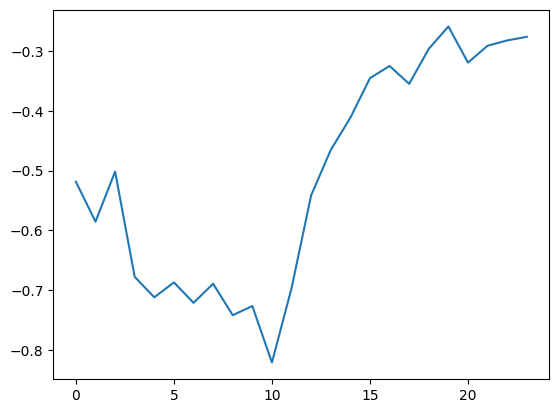

In [70]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(prediction[0,:,-1])
plt.show()

In [8]:
preds = np.load('./results/' + setting + '/pred.npy')
trues = np.load('./results/' + setting + '/true.npy')

# [samples, pred_len, dimensions]
preds.shape, trues.shape

((2848, 24, 7), (2848, 24, 7))

In [72]:
preds[0,:,-1], trues[0,:,-1]

(array([-0.84958744, -0.848398  , -0.83372736, -0.94589555, -0.9695827 ,
        -0.93191946, -0.9484027 , -0.89575934, -0.8422259 , -0.72916687,
        -0.6793129 , -0.6602364 , -0.5685268 , -0.5276728 , -0.46943086,
        -0.56739414, -0.5891186 , -0.66715586, -0.5765066 , -0.71432805,
        -0.67158675, -0.6943668 , -0.6926054 , -0.6876044 ], dtype=float32),
 array([-0.8623407 , -0.86996883, -0.83161   , -0.8775971 , -0.915956  ,
        -0.8929624 , -0.9005906 , -0.9005906 , -0.8393472 , -0.8393472 ,
        -0.80861646, -0.7932511 , -0.77025753, -0.5939374 , -0.5403222 ,
        -0.6476616 , -0.66302705, -0.60167456, -0.67065525, -0.6246682 ,
        -0.68602055, -0.68602055, -0.7396359 , -0.8546035 ], dtype=float32))

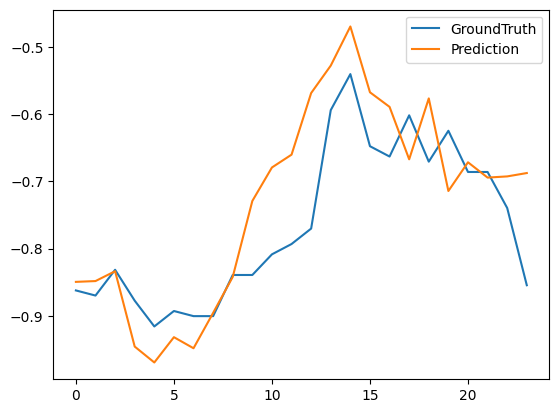

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# draw OT prediction
plt.figure()
plt.plot(trues[0, :, -1], label='GroundTruth')
plt.plot(preds[0, :, -1], label='Prediction')
plt.legend()
plt.show()

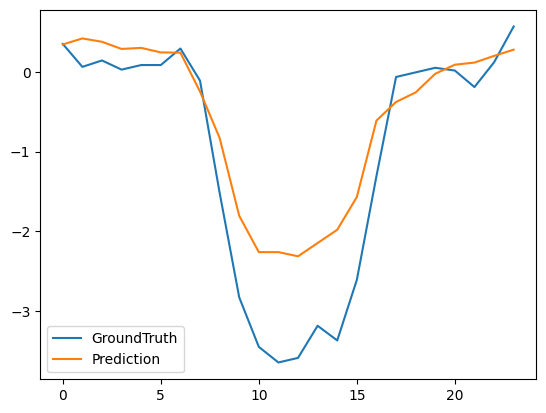

In [74]:
plt.figure()
plt.plot(trues[0, :, 0], label='GroundTruth')
plt.plot(preds[0, :, 0], label='Prediction')
plt.legend()
plt.show()

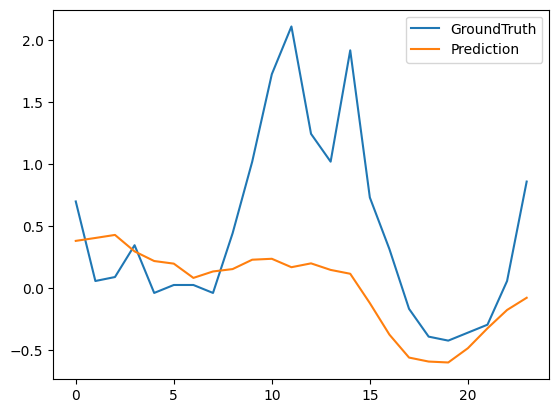

In [75]:
plt.figure()
plt.plot(trues[0, :, 1], label='GroundTruth')
plt.plot(preds[0, :, 1], label='Prediction')
plt.legend()
plt.show()

In [7]:
from utils.metrics import metric

In [10]:
mae,mse,rmse,mape,mspe = metric(preds, trues)

In [12]:
mae,mse,rmse,mape,mspe

(0.5519557, 0.55836934, 0.74724114, 10.354746, 33046.79)